# Machine Learning for Price Comparison

In [ ]:
import pandas as pd

# Lien vers ton API Flask exposée via ngrok
url = 'https://9501-41-226-212-85.ngrok-free.app/api/dim_Produit'

# Lire les données depuis l’API
df = pd.read_json(url)

# Afficher les premières lignes
df.head()


,Id_Produit,Id_Magazin,Code_Produit,Nom_Produit,Catégorie_Produit,Prix_Unitaire,Prix_Total
0,160639,19,C-1,C-Eau minérale DÉLICE 1.5LDÉLICELa bouteille d...,boisson,34.855999,104.570000
1,160640,19,C-2,C-Eau minérale SAFIA 1.5LSAFIALa bouteille de...,boisson,70.120003,210.360001
2,160641,19,C-3,C-Eau minérale TIJEN 1.5LTIJENLa bouteille de ...,boisson,81.449997,162.899994
3,160642,19,C-4,C-Eau minérale SABRINE 1.5LSABRINELa bouteille...,boisson,62.287998,124.580002
4,160643,19,C-5,C-COCA COLA zéroCOCA COLALa canette de 24cl,boisson,70.480003,70.480003


**Analyse exploratoire du DataFrame**

In [ ]:
# Aperçu des types et des valeurs manquantes
df.info()

# Nombre de valeurs nulles par colonne
print("\nValeurs manquantes :\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14356 entries, 0 to 14355
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id_Produit         14356 non-null  int64  
 1   Id_Magazin         14356 non-null  int64  
 2   Code_Produit       14356 non-null  object 
 3   Nom_Produit        14356 non-null  object 
 4   Catégorie_Produit  14356 non-null  object 
 5   Prix_Unitaire      14356 non-null  float64
 6   Prix_Total         14356 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 785.2+ KB

Valeurs manquantes :
 Id_Produit           0
Id_Magazin           0
Code_Produit         0
Nom_Produit          0
Catégorie_Produit    0
Prix_Unitaire        0
Prix_Total           0
dtype: int64


In [ ]:
# Statistiques sur les colonnes numériques
df.describe()


,Id_Produit,Id_Magazin,Prix_Unitaire,Prix_Total
count,14356.000000,14356.000000,14356.000000,14356.000000
mean,167821.366467,30.101421,49.656832,99.294499
std,4146.187438,8.751535,23.966576,65.870086
min,160639.000000,19.000000,8.000000,8.050000
25%,164230.750000,19.000000,29.065000,47.910000
50%,167819.500000,37.000000,49.260000,80.340000
75%,171412.250000,37.000000,68.642500,141.712505
max,175001.000000,37.000000,99.989998,299.970001


In [ ]:
# Liste des catégories de produits
print("Catégories de produit :", df['Catégorie_Produit'].unique())

# Nombre de produits par catégorie
df['Catégorie_Produit'].value_counts()


Catégories de produit : ['boisson' 'epicerie' 'hygiene' 'marche' 'cremerie']


,count
Catégorie_Produit,
epicerie,6662
hygiene,4404
marche,1840
boisson,780
cremerie,670


**Préparation des données pour le Machine Learning**

In [ ]:
# On crée une copie pour le ML
df_ml = df.copy()

# On garde les colonnes utiles pour le clustering
df_ml = df_ml[['Catégorie_Produit', 'Prix_Unitaire']]
df_ml.head()


,Catégorie_Produit,Prix_Unitaire
0,boisson,34.855999
1,boisson,70.120003
2,boisson,81.449997
3,boisson,62.287998
4,boisson,70.480003


# Apprentissage supervisé
Prédire la catégorie d’un produit (Catégorie_Produit) à partir d'autres informations

In [ ]:
# === 1. Chargement des bibliothèques ===
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# === 3. Nettoyage & Préparation des données ===
df_clf = df.copy()

# Supprimer les colonnes inutiles (id, noms textes)
df_clf = df_clf.drop(columns=['Id_Produit', 'Id_Magazin', 'Code_Produit', 'Nom_Produit'])

# Encoder la variable cible (Catégorie_Produit)
label_encoder = LabelEncoder()
df_clf['Catégorie_Code'] = label_encoder.fit_transform(df_clf['Catégorie_Produit']) #transform : applique cette transformation.

# Séparer X et y
X = df_clf.drop(columns=['Catégorie_Produit', 'Catégorie_Code'])  # enlèves les colonnes ciblées (Catégorie_Produit et Catégorie_Code) de X car elles ne doivent pas être utilisées pour prédire
y = df_clf['Catégorie_Code']  #Tu définis y comme la colonne encodée numériquement à prédire.

# Standardiser les variables numériques
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# === 4. Séparation train/test ===
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# === 5. Modélisation avec différents algorithmes ===
# 5.1 Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# 5.2 Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# 5.3 Support Vector Machine (SVM)
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# 5.4 K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [ ]:
# === 6. Fonction d'évaluation des modèles ===
# Cette fonction calcule et affiche le classification report et la matrice de confusion
def evaluate_model(y_test, y_pred, model_name):   #Déclaration de la fonction
    print(f"=== {model_name} ===")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))   # Affichage du rapport de classification nom des classes (catégories) encodées par LabelEncoder, pour avoir un affichage lisible.
    cm = confusion_matrix(y_test, y_pred)    #Calcul de la matrice de confusion
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cmap='Blues')
    plt.xlabel("Prédiction")
    plt.ylabel("Réel")
    plt.title(f"Matrice de confusion - {model_name}")
    plt.show()

 Évaluation des modèles

=== Random Forest ===
              precision    recall  f1-score   support

     boisson       0.05      0.04      0.05       156
    cremerie       0.12      0.10      0.11       134
    epicerie       0.50      0.56      0.53      1333
     hygiene       0.43      0.39      0.41       881
      marche       0.11      0.10      0.11       368

    accuracy                           0.40      2872
   macro avg       0.24      0.24      0.24      2872
weighted avg       0.39      0.40      0.39      2872



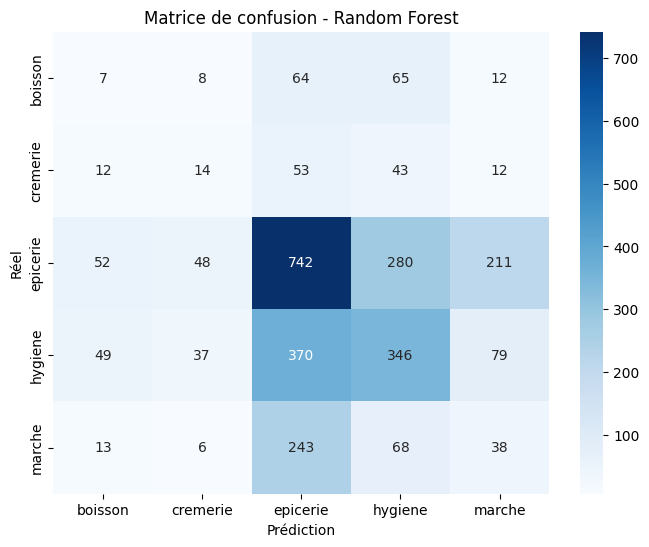

=== Logistic Regression ===
              precision    recall  f1-score   support

     boisson       0.00      0.00      0.00       156
    cremerie       0.00      0.00      0.00       134
    epicerie       0.46      1.00      0.63      1333
     hygiene       0.00      0.00      0.00       881
      marche       0.00      0.00      0.00       368

    accuracy                           0.46      2872
   macro avg       0.09      0.20      0.13      2872
weighted avg       0.22      0.46      0.29      2872



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


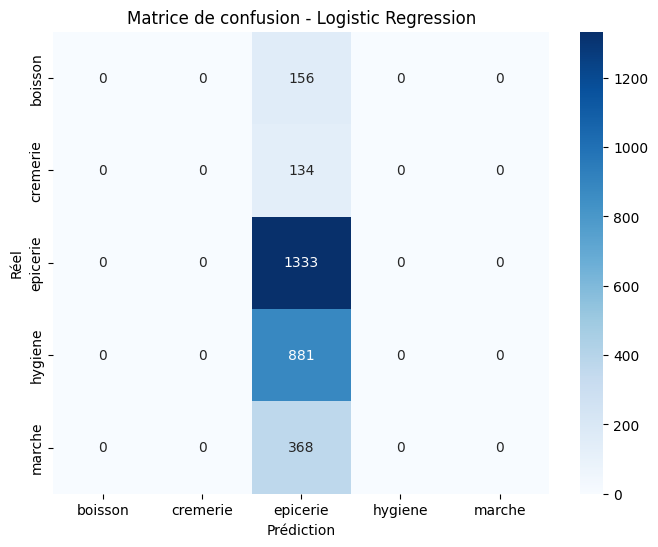

=== SVM ===
              precision    recall  f1-score   support

     boisson       0.00      0.00      0.00       156
    cremerie       0.00      0.00      0.00       134
    epicerie       0.46      1.00      0.63      1333
     hygiene       0.00      0.00      0.00       881
      marche       0.00      0.00      0.00       368

    accuracy                           0.46      2872
   macro avg       0.09      0.20      0.13      2872
weighted avg       0.22      0.46      0.29      2872



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


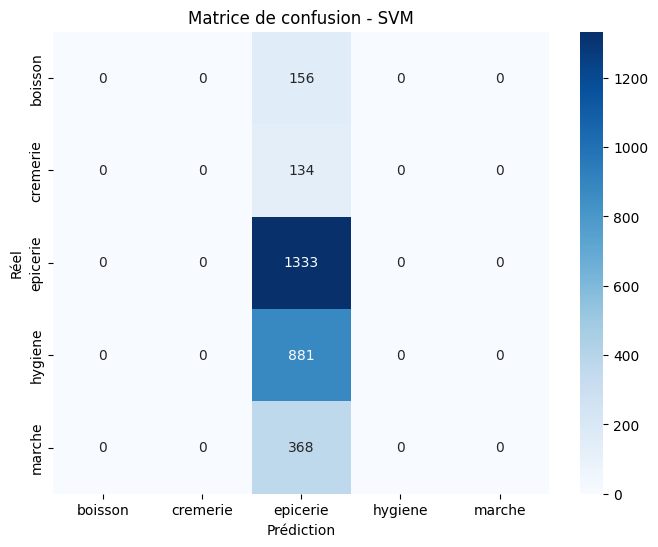

=== KNN ===
              precision    recall  f1-score   support

     boisson       0.02      0.01      0.02       156
    cremerie       0.07      0.03      0.04       134
    epicerie       0.47      0.68      0.56      1333
     hygiene       0.37      0.29      0.33       881
      marche       0.09      0.02      0.04       368

    accuracy                           0.41      2872
   macro avg       0.21      0.21      0.20      2872
weighted avg       0.35      0.41      0.37      2872



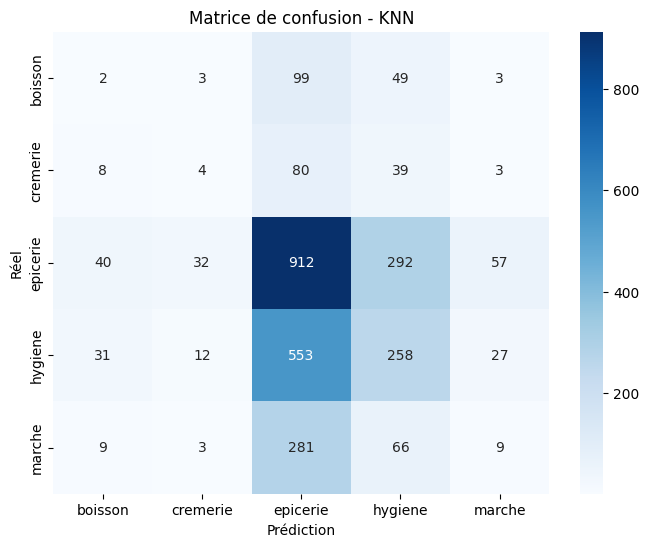

In [ ]:
# 7.1 Évaluer le Random Forest
evaluate_model(y_test, y_pred_rf, "Random Forest")

# 7.2 Évaluer la Logistic Regression
evaluate_model(y_test, y_pred_log_reg, "Logistic Regression")

# 7.3 Évaluer le SVM
evaluate_model(y_test, y_pred_svm, "SVM")

# 7.4 Évaluer le KNN
evaluate_model(y_test, y_pred_knn, "KNN")

Quelles sont les variables les plus influentes pour prédire la cible ?

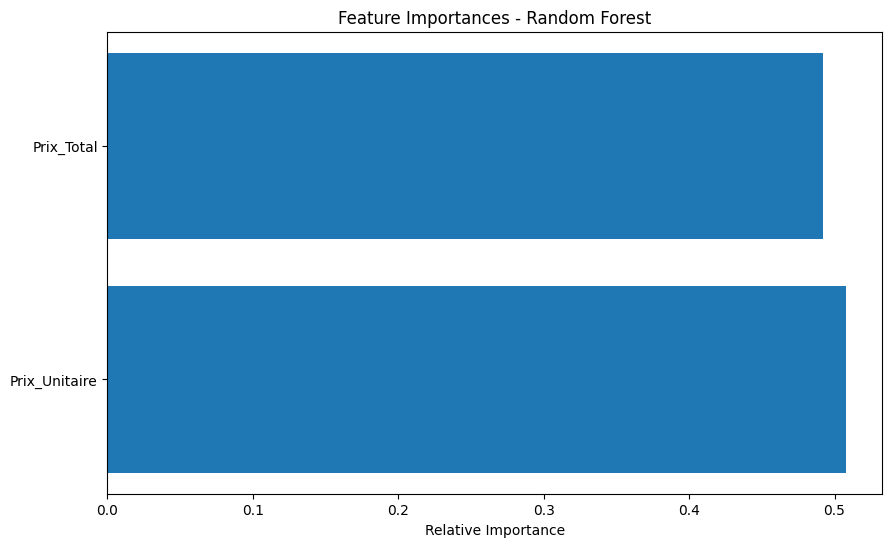

In [ ]:
# === 8. Feature Importance (Random Forest) ===
# Extraire et afficher l'importance des caractéristiques pour le modèle Random Forest
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plotting the feature importance for Random Forest
plt.figure(figsize=(10, 6))
plt.title("Feature Importances - Random Forest")
plt.barh(range(X.shape[1]), importances[indices], align="center")
plt.yticks(range(X.shape[1]), X.columns[indices])
plt.xlabel("Relative Importance")
plt.show()

In [ ]:
# === 9. Comparaison des modèles ===
# Calcul de la précision pour chaque modèle
rf_accuracy = rf_model.score(X_test, y_test)
log_reg_accuracy = log_reg.score(X_test, y_test)
svm_accuracy = svm.score(X_test, y_test)
knn_accuracy = knn.score(X_test, y_test)

# Affichage des précisions des modèles
print(f"Précision - Random Forest: {rf_accuracy:.4f}")
print(f"Précision - Logistic Regression: {log_reg_accuracy:.4f}")
print(f"Précision - SVM: {svm_accuracy:.4f}")
print(f"Précision - KNN: {knn_accuracy:.4f}")

Précision - Random Forest: 0.3994
Précision - Logistic Regression: 0.4641
Précision - SVM: 0.4641
Précision - KNN: 0.4126


# Tester XGBoostClassifier avec gestion du déséquilibre

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Étape 1 : calculer le scale_pos_weight ou utiliser 'balanced'
# Pour XGBoost, on peut pondérer les classes manuellement :
from sklearn.utils import compute_class_weight
import numpy as np

classes = np.unique(y_train) #récupères la liste unique des classes dans  variable cible y
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train) #calcules les poids équilibrés de chaque classe
class_weight_dict = dict(zip(classes, class_weights))  #transformes les classes et leurs poids en dictionnaire

# Étape 2 : créer le class weight en fonction de chaque classe
# XGBoost n'accepte pas directement class_weight, mais tu peux pondérer chaque observation :
sample_weights = y_train.map(class_weight_dict)

# Étape 3 : entraîner le modèle XGBoost
xgb_model = XGBClassifier(
    objective='multi:softmax',  # ou 'multi:softprob' pour probabilités
    num_class=len(classes), #le nombre total de classes.
    eval_metric='mlogloss',  #la métrique utilisée pendant l’entraînement.
    use_label_encoder=False,  #pour éviter un warning inutile.
    random_state=42  #pour rendre les résultats reproductibles.
)

xgb_model.fit(X_train, y_train, sample_weight=sample_weights)   #entraînes le modèle avec les poids personnalisés pour chaque observation.

# Étape 4 : Prédiction et évaluation
y_pred = xgb_model.predict(X_test)

print("=== XGBoostClassifier avec pondération ===")
print(classification_report(y_test, y_pred))
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:00:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


=== XGBoostClassifier avec pondération ===
              precision    recall  f1-score   support

           0       0.06      0.22      0.09       156
           1       0.04      0.21      0.07       134
           2       0.54      0.23      0.32      1333
           3       0.35      0.20      0.25       881
           4       0.11      0.18      0.14       368

    accuracy                           0.21      2872
   macro avg       0.22      0.21      0.17      2872
weighted avg       0.38      0.21      0.25      2872

Accuracy : 0.21030640668523676
Confusion Matrix :
 [[ 34  36  26  33  27]
 [ 30  28  19  26  31]
 [245 295 304 196 293]
 [182 194 147 172 186]
 [ 85  91  65  61  66]]


# SMOTE (Synthetic Minority Over-sampling Technique) pour équilibrer les classes

Appliquer SMOTE après le split

In [ ]:
from imblearn.over_sampling import SMOTE
# Appliquer SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Afficher les nouvelles répartitions des classes (optionnel)
print("Répartition des classes après SMOTE :")
print(pd.Series(y_train_smote).value_counts())


Répartition des classes après SMOTE :
Catégorie_Code
3    5329
2    5329
1    5329
0    5329
4    5329
Name: count, dtype: int64


Re-train SVM et KNN avec SMOTE

In [ ]:
# SVM avec données équilibrées
svm_smote = SVC(random_state=42)
svm_smote.fit(X_train_smote, y_train_smote)
y_pred_svm_smote = svm_smote.predict(X_test)

# KNN avec données équilibrées
knn_smote = KNeighborsClassifier()
knn_smote.fit(X_train_smote, y_train_smote)
y_pred_knn_smote = knn_smote.predict(X_test)


Évaluation après SMOTE

=== SVM avec SMOTE ===
              precision    recall  f1-score   support

     boisson       0.06      0.54      0.11       156
    cremerie       0.04      0.22      0.07       134
    epicerie       0.49      0.10      0.17      1333
     hygiene       0.33      0.05      0.09       881
      marche       0.14      0.15      0.15       368

    accuracy                           0.12      2872
   macro avg       0.21      0.21      0.12      2872
weighted avg       0.35      0.12      0.13      2872



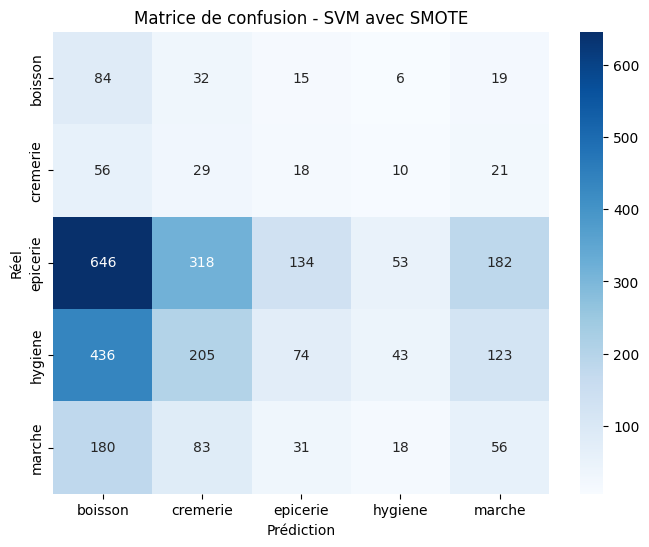

=== KNN avec SMOTE ===
              precision    recall  f1-score   support

     boisson       0.07      0.28      0.11       156
    cremerie       0.05      0.19      0.08       134
    epicerie       0.55      0.33      0.41      1333
     hygiene       0.39      0.22      0.28       881
      marche       0.10      0.11      0.11       368

    accuracy                           0.26      2872
   macro avg       0.23      0.23      0.20      2872
weighted avg       0.39      0.26      0.30      2872



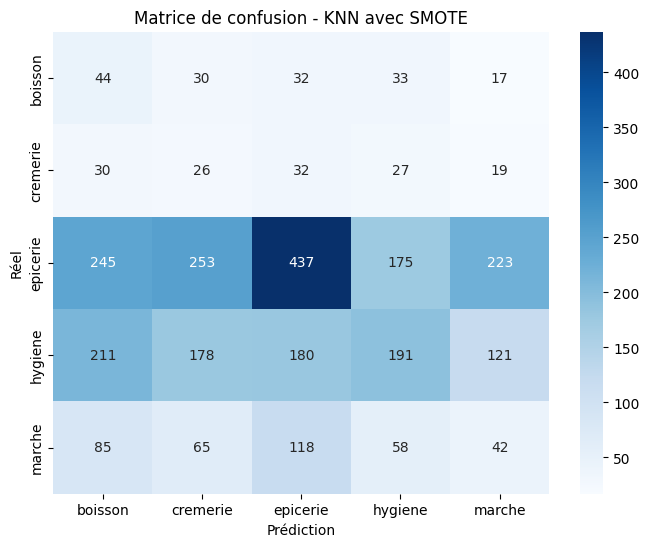

In [ ]:
# Évaluer SVM SMOTE
evaluate_model(y_test, y_pred_svm_smote, "SVM avec SMOTE")

# Évaluer KNN SMOTE
evaluate_model(y_test, y_pred_knn_smote, "KNN avec SMOTE")


SVM:SMOTE a trop "rééquilibrer" les classes, ce qui a déstabilisé le modèle. SVM est sensible aux données synthétiques générées.

KNN:Amélioration partielle de l'équilibre, mais perte de performance globale.

In [ ]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

# Appliquer SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Entraîner XGBoost
xgb_model = XGBClassifier(
    objective='multi:softmax',
    num_class=len(np.unique(y_train)),
    eval_metric='mlogloss',
    random_state=42
)
xgb_model.fit(X_resampled, y_resampled)   #entraînes le modèle XGBoost sur le jeu de données équilibré avec SMOTE.

# Prédiction les classes sur le jeu de test initial
y_pred = xgb_model.predict(X_test)

print("=== XGBoost + SMOTE ===")
print(classification_report(y_test, y_pred))


=== XGBoost + SMOTE ===
              precision    recall  f1-score   support

           0       0.06      0.22      0.09       156
           1       0.04      0.19      0.07       134
           2       0.53      0.25      0.34      1333
           3       0.38      0.21      0.27       881
           4       0.10      0.17      0.13       368

    accuracy                           0.22      2872
   macro avg       0.22      0.21      0.18      2872
weighted avg       0.38      0.22      0.26      2872



# Random Forest avec SMOTE

=== Random Forest avec SMOTE ===
              precision    recall  f1-score   support

     boisson       0.09      0.25      0.13       156
    cremerie       0.06      0.19      0.09       134
    epicerie       0.56      0.40      0.47      1333
     hygiene       0.44      0.27      0.33       881
      marche       0.10      0.14      0.12       368

    accuracy                           0.31      2872
   macro avg       0.25      0.25      0.23      2872
weighted avg       0.42      0.31      0.35      2872



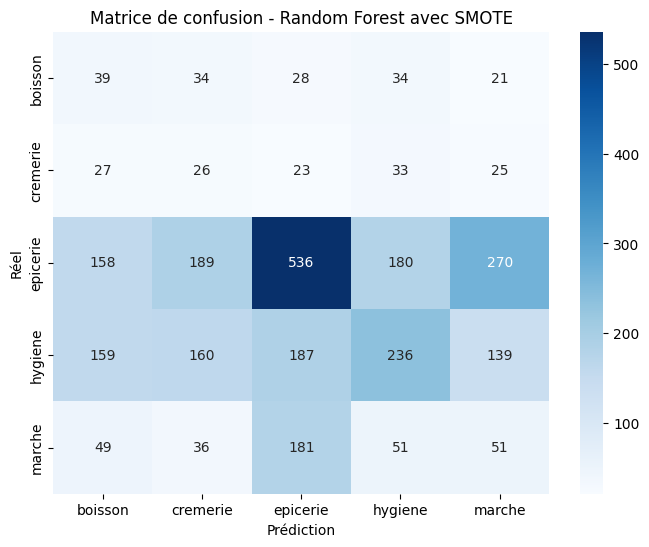

Précision - Random Forest avec SMOTE: 0.3092


In [ ]:
from imblearn.over_sampling import SMOTE

# === SMOTE pour équilibrer les classes ===
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# === Random Forest avec données SMOTE ===
rf_model_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_smote.fit(X_train_smote, y_train_smote)
y_pred_rf_smote = rf_model_smote.predict(X_test)

# === Évaluation du modèle SMOTE ===
evaluate_model(y_test, y_pred_rf_smote, "Random Forest avec SMOTE")

# === Précision ===
rf_smote_accuracy = rf_model_smote.score(X_test, y_test)
print(f"Précision - Random Forest avec SMOTE: {rf_smote_accuracy:.4f}")


SMOTE a ajouté de fausses données pour équilibrer les classes, mais cela a embrouillé le modèle. Du coup, il a fait plus d’erreurs. Random Forest marchait déjà bien sans SMOTE, donc l’ajout a rendu les résultats moins bons.

# Résumé comparatif des performances des modèles de classification

In [ ]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Liste des modèles (Nom, Modèle, SMOTE: True/False)
models_to_test = [
    ('Logistic Regression', LogisticRegression(random_state=42), False),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42), False),
    ('Random Forest + SMOTE', RandomForestClassifier(n_estimators=100, random_state=42), True),
    ('SVM', SVC(random_state=42), False),
    ('SVM + SMOTE', SVC(random_state=42), True),
    ('KNN', KNeighborsClassifier(), False),
    ('KNN + SMOTE', KNeighborsClassifier(), True),
    ('XGBoost', XGBClassifier(random_state=42, eval_metric='mlogloss'), False),
    ('XGBoost + SMOTE', XGBClassifier(random_state=42, eval_metric='mlogloss'), True)
]

# Résultats
results = []

for name, model, use_smote in models_to_test:
    if use_smote:
        smote = SMOTE(random_state=42)
        X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
    else:
        X_resampled, y_resampled = X_train, y_train

    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)

    results.append({
        'Modèle': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1-score': f1_score(y_test, y_pred, average='macro', zero_division=0),
        'Precision': precision_score(y_test, y_pred, average='macro', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='macro', zero_division=0)
    })

# Affichage trié par F1-score
results_df = pd.DataFrame(results).sort_values(by='F1-score', ascending=False)
print(results_df)


                  Modèle  Accuracy  F1-score  Precision    Recall
1          Random Forest  0.399373  0.241517   0.243995  0.240397
2  Random Forest + SMOTE  0.309192  0.228254   0.250540  0.250519
6            KNN + SMOTE  0.257660  0.197213   0.231947  0.226969
5                    KNN  0.412604  0.196552   0.205490  0.208830
7                XGBoost  0.449861  0.186485   0.298895  0.213750
8        XGBoost + SMOTE  0.219708  0.178686   0.223393  0.205943
0    Logistic Regression  0.464136  0.126801   0.092827  0.200000
3                    SVM  0.464136  0.126801   0.092827  0.200000
4            SVM + SMOTE  0.120474  0.115585   0.213292  0.211277


**Conclusion : Le Random Forest est le modèle le plus performant pour notre jeu de données déséquilibré, selon le critère du F1-score.**

# Regrouper les produits en différents groupes (ou clusters) selon leurs caractéristiques, comme le prix unitaire et la catégorie.

**Apprentissage utilisée : Non supervisée (Clustering ou regroupement)**

Encodage des catégories pour le Machine Learning

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encodage de la catégorie
encoder = LabelEncoder()
df_ml['Catégorie_Produit_Code'] = encoder.fit_transform(df_ml['Catégorie_Produit'])

# Supprimer l'ancienne colonne texte
df_ml = df_ml.drop('Catégorie_Produit', axis=1)

df_ml.head()


,Prix_Unitaire,Catégorie_Produit_Code
0,43.570000,0
1,70.120003,0
2,65.160004,0
3,77.860001,0
4,70.480003,0


from matplotlib import pyplot as plt
_df_2['Prix_Unitaire'].plot(kind='hist', bins=20, title='Prix_Unitaire')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Catégorie_Produit_Code']
  ys = series['Prix_Unitaire']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('Catégorie_Produit_Code', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Catégorie_Produit_Code')
_ = plt.ylabel('Prix_Unitaire')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Catégorie_Produit_Code']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Catégorie_Produit_Code'}, axis=1)
              .sort_values('Catégorie_Produit_Code', ascending=True))
  xs = counted['Catégorie_Produit_Code']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Catégorie_Produit_Code', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Catégorie_Produit_Code')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['Prix_Unitaire'].plot(kind='line', figsize=(8, 4), title='Prix_Unitaire')
plt.gca().spines[['top', 'right']].set_visible(False)

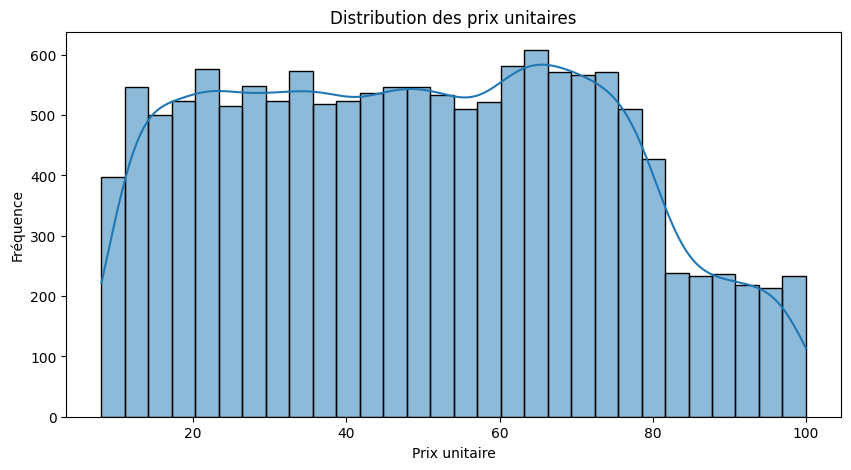

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution du prix unitaire
plt.figure(figsize=(10,5))
sns.histplot(df_ml['Prix_Unitaire'], bins=30, kde=True)
plt.title("Distribution des prix unitaires")
plt.xlabel("Prix unitaire")
plt.ylabel("Fréquence")
plt.show()


**Méthode du Coude pour K-means Clustering**

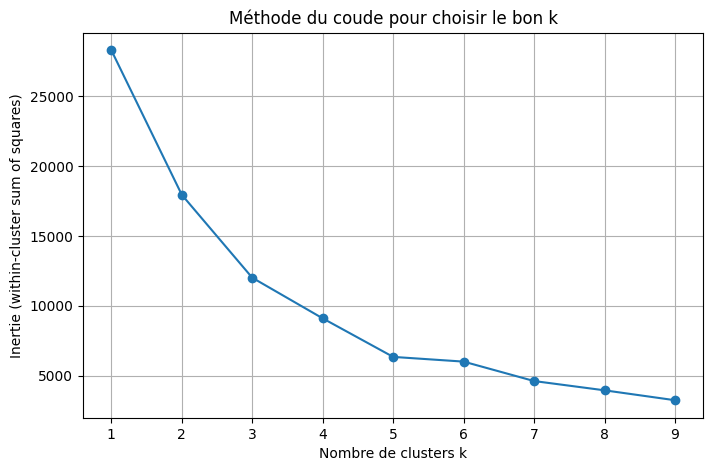

In [ ]:
#liste vide qui va contenir les valeurs d’inertie pour chaque nombre de clusters k
inertias = []
#applique une normalisation ou standardisation pour que les variables soient sur la même échelle (important pour KMeans).
X_scaled = scaler.fit_transform(df_ml.drop(columns=['Cluster'], errors='ignore'))
#tester différents nombres de clusters
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    #tracer l'évolution de l’inertie en fonction de k.
    inertias.append(kmeans.inertia_)

# Tracer la courbe
plt.figure(figsize=(8,5))
plt.plot(range(1, 10), inertias, marker='o')
plt.title("Méthode du coude pour choisir le bon k")
plt.xlabel("Nombre de clusters k")
plt.ylabel("Inertie (within-cluster sum of squares)")
plt.grid(True)
plt.show()


**Évaluation du Clustering avec le Score de Silhouette**

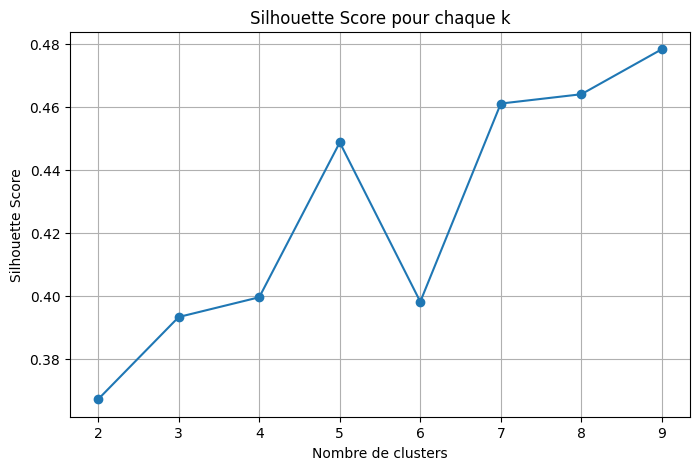

In [ ]:
from sklearn.metrics import silhouette_score
#évaluer la qualité du clustering K-means
#Initialisation de la liste des scores de silhouette
silhouette_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    # contient les étiquettes de cluster pour chaque point.
    preds = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, preds)
    #ajoutes le score de silhouette pour ce k dans la liste
    silhouette_scores.append(score)

# Courbe du score de silhouette
plt.figure(figsize=(8,5))
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title("Silhouette Score pour chaque k")
plt.xlabel("Nombre de clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# Appliquer KMeans avec k=5 (nombre de clusters)
kmeans_final = KMeans(n_clusters=5, random_state=42)
df_ml['Cluster'] = kmeans_final.fit_predict(X_scaled)

# Visualiser les premières lignes avec les clusters
df_ml.head()


,Prix_Unitaire,Catégorie_Produit_Code,Cluster
0,43.570000,0,2
1,70.120003,0,2
2,65.160004,0,2
3,77.860001,0,2
4,70.480003,0,2


**Visualisation du Clustering final (k = 5) Comprendre comment les produits ont catégorie et prix.**

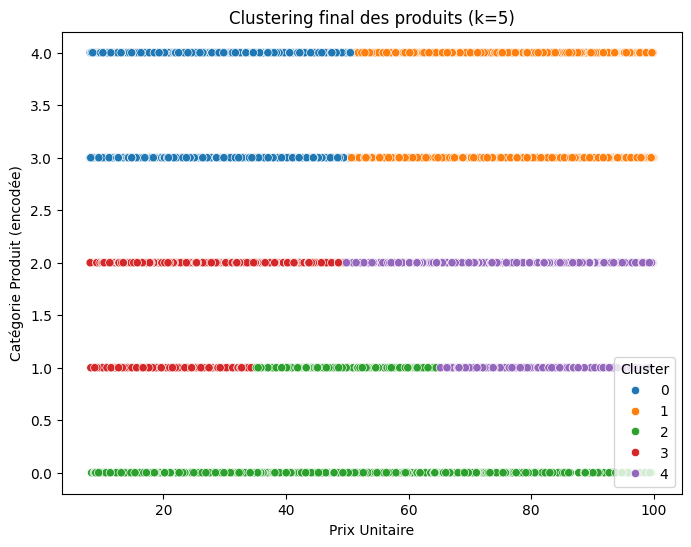

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df_ml['Prix_Unitaire'],
    y=df_ml['Catégorie_Produit_Code'],
    hue=df_ml['Cluster'],
    palette='tab10'
)
plt.title("Clustering final des produits (k=5)")
plt.xlabel("Prix Unitaire")
plt.ylabel("Catégorie Produit (encodée)")
plt.legend(title="Cluster")
plt.show()


In [ ]:
# Fusionner les résultats de clustering avec les données d’origine
df_clustered = df.copy()
df_clustered['Cluster'] = df_ml['Cluster']

# Exporter en CSV
df_clustered.to_csv('produits_clusterisés.csv', index=False)


In [ ]:
from google.colab import files
files.download('produits_clusterisés.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Conclusion:Nous avons utilisé le clustering KMeans pour regrouper les produits selon leurs caractéristiques. Après analyse, nous avons choisi de créer 5 groupes. Cela nous aide à mieux comprendre les types de produits et à prendre de meilleures décisions**

# Analyse prédictive du prix unitaire des produits

**L'objectif de ce travail était de prédire les prix unitaires des produits en utilisant plusieurs modèles de régression.**

Apprentissage supervisé régression Optimisation des Prix_Unitaire


 Random Forest
MSE : 601.51
R² : -0.0527

 Gradient Boosting
MSE : 569.2
R² : 0.0038

 Ridge Regression
MSE : 576.07
R² : -0.0082

 SVR
MSE : 572.27
R² : -0.0015

 XGBoost
MSE : 578.86
R² : -0.0131

 Classement des modèles (du meilleur au pire MSE) :
              Modèle         MSE        R²
1  Gradient Boosting  569.199448  0.003846
3                SVR  572.271602 -0.001530
2   Ridge Regression  576.065953 -0.008171
4            XGBoost  578.863023 -0.013066
0      Random Forest  601.510506 -0.052701


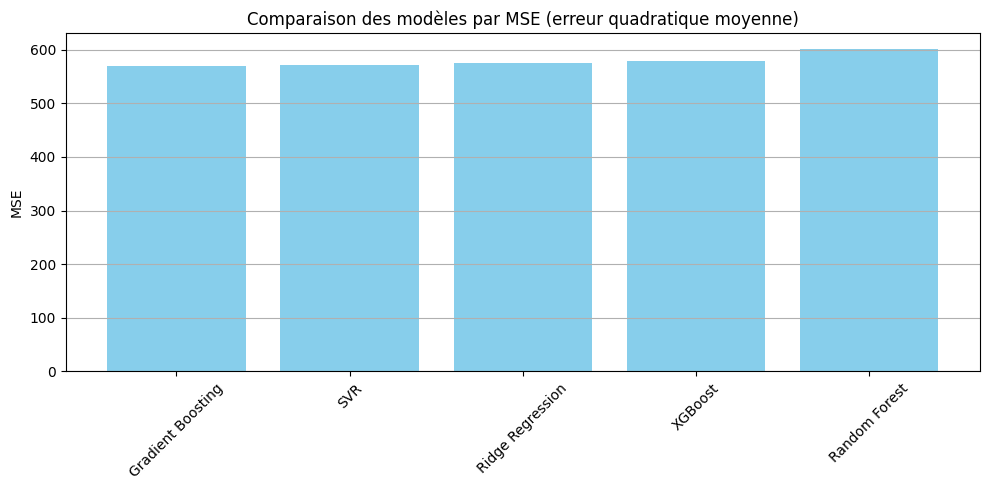

In [ ]:
##Trouver le meilleur modèle pour prédire le prix d’un produit à partir de son nom
# 1. Imports
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

from scipy.sparse import hstack
import matplotlib.pyplot as plt

# 2. Nettoyage des données
df = df.dropna(subset=['Nom_Produit', 'Catégorie_Produit', 'Prix_Unitaire'])

# 3. Traitement NLP (TF-IDF) sur Nom_Produit
tfidf = TfidfVectorizer(max_features=100, stop_words='english')
X_name = tfidf.fit_transform(df['Nom_Produit'])

# 4. Encodage catégorie
le = LabelEncoder()
X_cat = le.fit_transform(df['Catégorie_Produit'])

# 5. Création de la Feature Matrix et de la cible
X = hstack([X_name, np.array(X_cat).reshape(-1, 1)])
y = df['Prix_Unitaire']

# 6. Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Définition des modèles
models = {
    "Random Forest": RandomForestRegressor(),      #Type : Régression par arbres (non linéaire)
    "Gradient Boosting": GradientBoostingRegressor(),      #Type : Boosting (non linéaire)
    "Ridge Regression": Ridge(),                           #Type : Régression linéaire régularisée (L2)
    "SVR": SVR()                                        #Type : Support Vector Regression (non linéaire)
}

# (Optionnel) XGBoost si installé
try:
    from xgboost import XGBRegressor
    models["XGBoost"] = XGBRegressor()                #Type : Boosting optimisé ( Version ultra performant)
except ImportError:
    print(" XGBoost non installé — ignoré.")

# 8. Entraînement et évaluation
##MSE : Erreur quadratique moyenne (la moyenne des carrés des écarts entre les vraies valeurs (y_test) et les valeurs prédites (y_pred).)
##R² : Coefficient de détermination (mesure la qualité de la prédiction)
results = []

for name, model in models.items():
    model.fit(X_train, y_train)     # entraînement du modèle
    y_pred = model.predict(X_test)  # prédictions sur les données de test
    mse = mean_squared_error(y_test, y_pred) # mse(On compare les valeurs réelles,les valeurs prédites pour voir si le modèle est bon ou pas.)
    r2 = r2_score(y_test, y_pred)          # score R²
    results.append((name, mse, r2))        # sauvegarde des résultats
    print(f"\n {name}")
    print("MSE :", round(mse, 2))
    print("R² :", round(r2, 4))

# 9. Résumé
df_results = pd.DataFrame(results, columns=['Modèle', 'MSE', 'R²']).sort_values(by='MSE')
print("\n Classement des modèles (du meilleur au pire MSE) :")
print(df_results)

# 10. Visualisation
plt.figure(figsize=(10, 5))
plt.bar(df_results['Modèle'], df_results['MSE'], color='skyblue')
plt.title("Comparaison des modèles par MSE (erreur quadratique moyenne)")
plt.ylabel("MSE")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Le modèle **Gradient Boosting** est le meilleur car il a le MSE le plus bas (donc moins d’erreur) et le R² le plus élevé (donc il explique mieux la variation de la cible). Les autres modèles sont moins performants.

**Traville avec le meilleur modèle**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model_final = GradientBoostingRegressor()
model_final.fit(X_train, y_train)
#prédictions sur les données de test X_test.
#les prix prédits par le modèle Gradient Boosting.
y_pred_final = model_final.predict(X_test)


<ipython-input-33-0d3e456792c8>:11: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


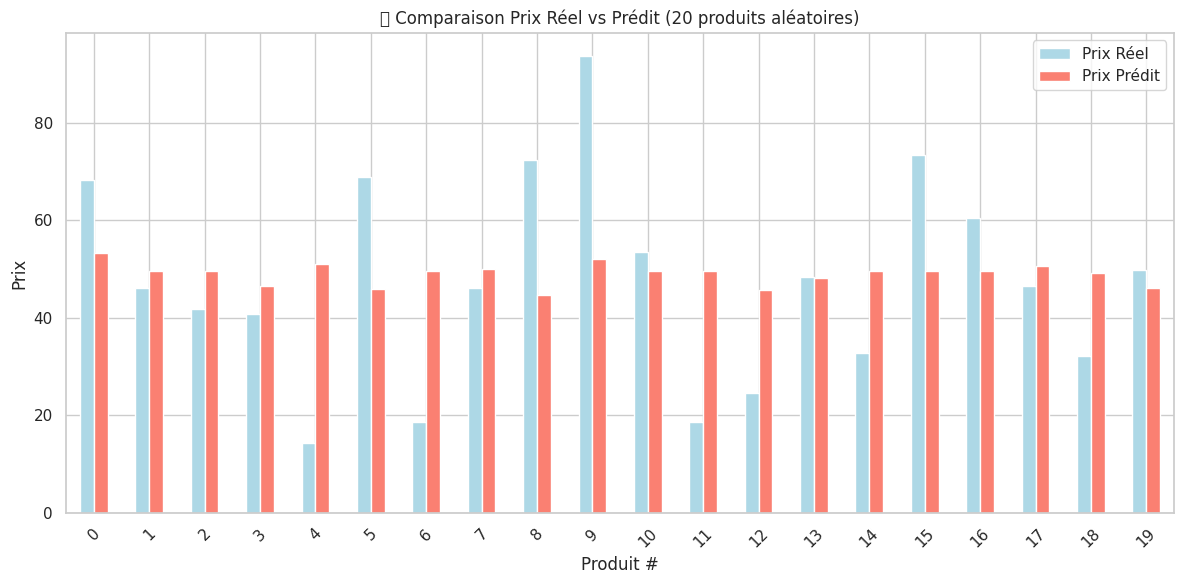

In [ ]:
# Échantillon aléatoire
df_sample = df_result.sample(20, random_state=42).reset_index(drop=True)

# Bar plot
df_sample.plot(kind='bar', figsize=(12, 6), color=['lightblue', 'salmon'])
plt.title(" Comparaison Prix Réel vs Prédit (20 produits aléatoires)")
plt.xlabel("Produit #")
plt.ylabel("Prix")
plt.legend(["Prix Réel", "Prix Prédit"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df_result.to_csv("resultat_predictions_gradient_boosting.csv", index=False)


In [ ]:
from google.colab import files
files.download("resultat_predictions_gradient_boosting.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Conclusion:Nous avons testé plusieurs modèles pour prédire les prix des produits. Le Gradient Boosting a donné les meilleurs résultats, avec l'erreur la plus faible et la meilleure précision. Ce modèle est donc le plus adapté pour prédire les prix.**

## ***Système de recommandation basé sur la similarité de produits***

Apprentissage non supervisé

In [ ]:
!pip install gradio --quiet

import pandas as pd
import numpy as np
import difflib
import gradio as gr
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import hstack

# Fusion du texte
df['Texte_Produit'] = df['Nom_Produit'] + ' ' + df['Catégorie_Produit']

# TF-IDF sur le texte produit
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['Texte_Produit'])

#  Normalisation du prix unitaire
scaler = MinMaxScaler()
prix_norm = scaler.fit_transform(df[['Prix_Unitaire']])

#  Création du vecteur combiné (texte + prix)
X_combined = hstack([tfidf_matrix, prix_norm])

#  Calcul des similarités cosinus
cosine_sim = cosine_similarity(X_combined, X_combined)

#  Indexation des noms
indices = pd.Series(df.index, index=df['Nom_Produit']).drop_duplicates()

#  Fonction finale de recommandation
def recommander_produits(nom_input, budget_max, n=5):
  # Liste des noms de produits disponibles dans le DataFrame
    noms_possibles = df['Nom_Produit'].tolist()
     # Recherche des produits similaires donné par l'utilisateur
    correspondances = difflib.get_close_matches(nom_input, noms_possibles, n=1, cutoff=0.2)

    if not correspondances:
        return pd.DataFrame([{"Erreur": f"Aucun produit trouvé pour : '{nom_input}'"}])

    nom_trouve = correspondances[0]
    idx = indices[nom_trouve]
# Récupère les scores de similarité des produits par rapport au produit trouvé
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:]

    produit_indices = [i[0] for i in sim_scores]
    # Sélectionne les produits similaires et leurs informations
    resultats = df[['Nom_Produit', 'Catégorie_Produit', 'Prix_Unitaire']].iloc[produit_indices].copy()
    resultats = resultats[resultats['Prix_Unitaire'] <= budget_max].head(n)
     # Ajoute le produit de référence
    resultats.insert(0, "Produit de référence", nom_trouve)

    if resultats.empty:
        return pd.DataFrame([{"Info": f"Aucun produit trouvé dans le budget {budget_max} TND"}])
# Renvoie les produits recommandés
    return resultats.reset_index(drop=True)

#  Interface Gradio finale
interface = gr.Interface(
    fn=recommander_produits,
    inputs=[
        gr.Textbox(label=" Nom du produit (mot-clé)"),
        gr.Number(label=" Budget maximum (TND)", value=50)
    ],
    outputs="dataframe",
    title=" Recommandation Produits par mot-clé + budget",
    description="Tape un mot-clé (ex: 'coca', 'yaourt') et ton budget pour découvrir les produits similaires."
)

interface.launch(share=True)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 4.2 MB/s eta 0:00:00
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f3c092865d3df350a2.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


**Conclusion :Ce travail permet de recommander des produits similaires à partir d'un nom et d'un budget. L'utilisateur entre un produit et un prix, et le système propose des produits similaires qui respectent le budget. L'interface Gradio facilite l'interaction.**

# **Analyse des Séries Temporelles de l'évolution des quantités de produits achetés**

Apprentissage de séries temporelles

In [ ]:
import pandas as pd

#  URL de ton API Flask via Ngrok
base_url = "  https://fff0-197-14-210-79.ngrok-free.app  "

#  Import des 3 tables
df_achat = pd.read_json(f"{base_url}/api/achat")
df_produit = pd.read_json(f"{base_url}/api/dim_Produit")
df_date = pd.read_json(f"{base_url}/api/dim_Date")


InvalidURL: URL can't contain control characters. 'fff0-197-14-210-79.ngrok-free.app  ' (found at least ' ')

In [ ]:
import pandas as pd

#  URL de ton API Flask via Ngrok
base_url = "     https://916e-197-2-251-86.ngrok-free.app/api/achat "
b_url= "     https://916e-197-2-251-86.ngrok-free.app/api/dim_Produit "
ba_url= "   https://916e-197-2-251-86.ngrok-free.app/api/dim_Date "

# Lire les données depuis l’API
df_achat = pd.read_json(base_url)
df_produit = pd.read_json(b_url)
df_date = pd.read_json(ba_url)

#  Import des 3 tables
#df_achat = pd.read_json(f"{base_url}/api/achat")
#df_produit = pd.read_json(f"{base_url}/api/dim_Produit")
#df_date = pd.read_json(f"{base_url}/api/dim_Date")


Jointure (achat,produit,date)

In [ ]:
#  Jointure achat + produit via Id_Produit
df_join1 = pd.merge(df_achat, df_produit, on="Id_Produit", how="left")

#  Jointure avec la date via Id_date
df_final = pd.merge(df_join1, df_date, on="Id_date", how="left")

#  Aperçu du résultat
df_final.head()


,Id_Produit,Id_Magazin_x,Id_date,Id_Location,Prix_Unitaire_x,Prix_Total_x,Id_Magazin_y,Code_Produit,Nom_Produit,Catégorie_Produit,Prix_Unitaire_y,Prix_Total_y,Jour,Mois,Annee
0,160639,19,159968,6615,34.856,104.57,19,C-1,C-Eau minérale DÉLICE 1.5LDÉLICELa bouteille d...,boisson,34.855999,104.570000,28,9,2023
1,160640,19,160278,6615,70.120,210.36,19,C-2,C-Eau minérale SAFIA 1.5LSAFIALa bouteille de...,boisson,70.120003,210.360001,28,3,2024
2,160641,19,160384,9438,81.450,162.90,19,C-3,C-Eau minérale TIJEN 1.5LTIJENLa bouteille de ...,boisson,81.449997,162.899994,30,9,2024
3,160642,19,160474,9701,62.288,124.58,19,C-4,C-Eau minérale SABRINE 1.5LSABRINELa bouteille...,boisson,62.287998,124.580002,20,4,2023
4,160643,19,160492,9133,70.480,70.48,19,C-5,C-COCA COLA zéroCOCA COLALa canette de 24cl,boisson,70.480003,70.480003,27,3,2023


**Analyse exploratoire du DataFrame**

   Id_Produit  Id_Magazin_x  Id_date  Id_Location  Prix_Unitaire_x  \
0      160639            19   159968         6615           34.856   
1      160640            19   160278         6615           70.120   
2      160641            19   160384         9438           81.450   
3      160642            19   160474         9701           62.288   
4      160643            19   160492         9133           70.480   

   Prix_Total_x  Id_Magazin_y Code_Produit  \
0        104.57            19          C-1   
1        210.36            19          C-2   
2        162.90            19          C-3   
3        124.58            19          C-4   
4         70.48            19          C-5   

                                         Nom_Produit Catégorie_Produit  \
0  C-Eau minérale DÉLICE 1.5LDÉLICELa bouteille d...           boisson   
1  C-Eau minérale  SAFIA 1.5LSAFIALa bouteille de...           boisson   
2  C-Eau minérale TIJEN 1.5LTIJENLa bouteille de ...           boisson   
3  C-E

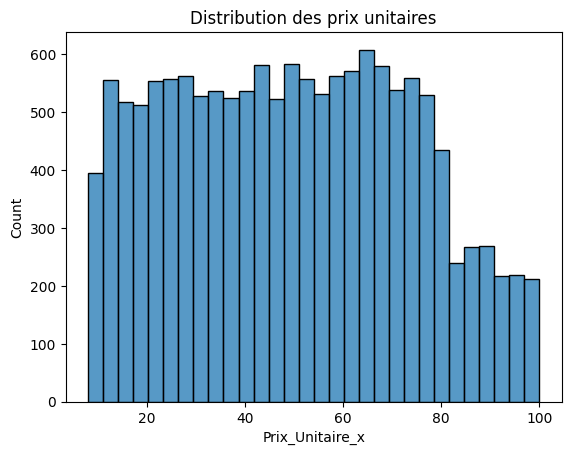

In [ ]:
import pandas as pd

# Affichage des premières lignes
print(df_final.head())

# Structure des données
print(df_final.info())

# Statistiques générales
print(df_final.describe())

# Valeurs manquantes
print(df_final.isnull().sum())

# Nombre de produits uniques
print(df_final['Nom_Produit'].nunique())

# Exemple de distribution des prix
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_final['Prix_Unitaire_x'], bins=30)
plt.title("Distribution des prix unitaires")
plt.show()


In [ ]:
# Création de la colonne 'date' à partir des colonnes existantes
df_final['date'] = pd.to_datetime(
    df_final.rename(columns={'Annee': 'year', 'Mois': 'month', 'Jour': 'day'})[['year', 'month', 'day']]
)


Trier par date

In [ ]:
# Trier les données par ordre chronologique selon la colonne 'date'.
df_final = df_final.sort_values(by='date')

# Vérification
print(df_final[['date']].head())
print(df_final[['date']].tail())


           date
186  2023-01-01
4333 2023-01-01
5458 2023-01-01
1721 2023-01-01
5512 2023-01-01
            date
8937  2024-12-31
12149 2024-12-31
10393 2024-12-31
7836  2024-12-31
12076 2024-12-31


Création de la colonne Quantité

In [ ]:
# Calcul de la Quantité vendue
df_final['Quantité'] = df_final['Prix_Total_x'] / df_final['Prix_Unitaire_x']

**Agrégation par Mois pour analyser l'évolution des ventes mensuelles.**

In [ ]:
# On regroupe les achats par mois pour voir l'évolution dans le temps
# Extraire le mois
df_final['mois'] = df_final['date'].dt.to_period('M')
# Regrouper par mois et sommer les quantités
ventes_mensuelles = df_final.groupby('mois')['Quantité'].sum().reset_index()

# Convertir en datetime pour l'affichage (Format lisible pour les graphiques)
ventes_mensuelles['mois'] = ventes_mensuelles['mois'].dt.to_timestamp()


**Visualisation des Ventes Mensuelles**

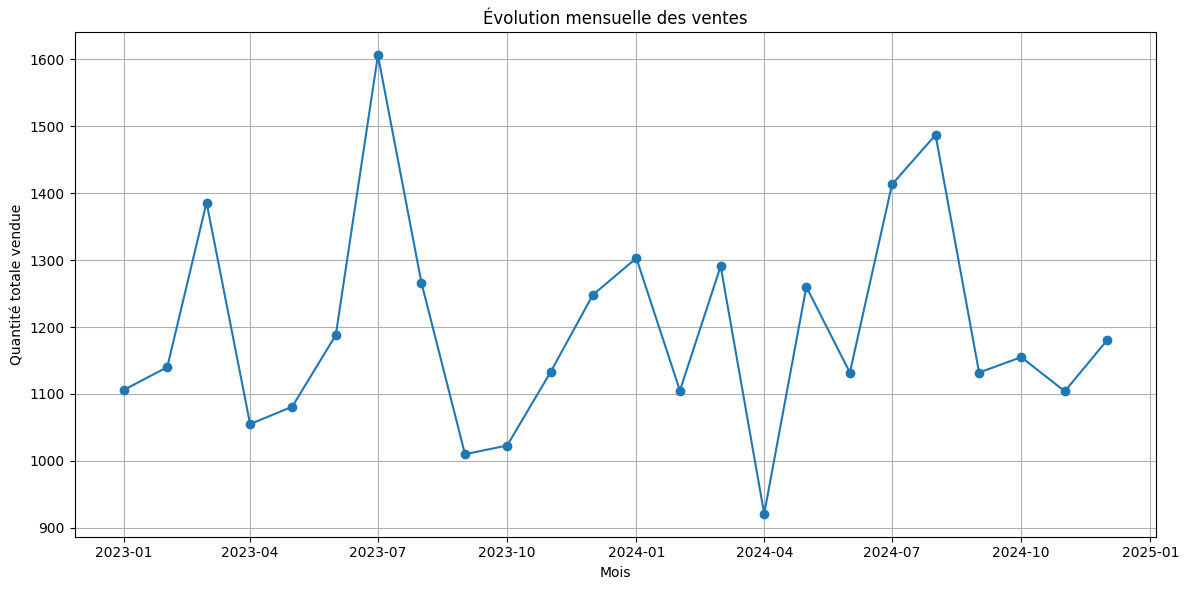

In [ ]:
#Visualisation de la série temporelle

plt.figure(figsize=(12,6))
plt.plot(ventes_mensuelles['mois'], ventes_mensuelles['Quantité'], marker='o')
plt.title("Évolution mensuelle des ventes")
plt.xlabel("Mois")
plt.ylabel("Quantité totale vendue")
plt.grid(True)
plt.tight_layout()
plt.show()


Découper les données en train/test

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Exemple : 80% train, 20% test
split_index = int(len(ventes_mensuelles) * 0.8)
train = ventes_mensuelles[:split_index]# De 0 à split_index-1 (les 80 premiers mois)
test = ventes_mensuelles[split_index:] # Du split_index jusqu’à la fin (les 20 derniers mois)


Créer un modèle de prévision simple

In [ ]:
# Moyenne mobile sur les 3 derniers mois
train = train.copy()
train.loc[:, 'prediction'] = train['Quantité'].rolling(window=3).mean()

# Modèle naïf : on prédit avec la dernière valeur du train
test = test.copy()
last_value = train['Quantité'].iloc[-1]
test.loc[:, 'prediction'] = [last_value] * len(test)


MAE (Mean Absolute Error) : calcule l'erreur absolue moyenne
RMSE (Root Mean Squared Error) : racine carrée du MSE, ce qui ramène l’erreur à la même unité que la variable (ici les Quantités)


In [ ]:
# Erreurs du modèle Naïf
mae_naif = mean_absolute_error(test['Quantité'], test['prediction'])
mse_naif = mean_squared_error(test['Quantité'], test['prediction'])
rmse_naif = np.sqrt(mse_naif)
r2_naif = r2_score(test['Quantité'], test['prediction'])

# Erreurs du modèle Moyenne Mobile
#on prédit avec la dernière valeur du train
last_mobile_value = train['prediction'].dropna().iloc[-1]
#crée une liste contenant une seule valeur
test['prediction_mobile'] = [last_mobile_value] * len(test) #* len(test) répète cette valeur autant de fois qu'il y a de lignes dans le DataFrame test.

mae_mobile = mean_absolute_error(test['Quantité'], test['prediction_mobile'])
mse_mobile = mean_squared_error(test['Quantité'], test['prediction_mobile'])
rmse_mobile = np.sqrt(mse_mobile)
r2_mobile = r2_score(test['Quantité'], test['prediction_mobile'])

Calculer les métriques de performance

In [ ]:
# Affichage des résultats
print("🔸 Modèle à Moyenne Mobile (3 mois)")
print("MAE:", mae_mobile)
print("MSE:", mse_mobile)
print("RMSE:", rmse_mobile)
print("R² Score:", r2_mobile)

print("\n🔹 Modèle Naïf (valeur du dernier mois du train)")
print("MAE:", mae_naif)
print("MSE:", mse_naif)
print("RMSE:", rmse_naif)
print("R² Score:", r2_naif)

🔸 Modèle à Moyenne Mobile (3 mois)
MAE: 144.19999999999996
MSE: 22810.911111111105
RMSE: 151.03281468313799
R² Score: -0.16428295647210867

🔹 Modèle Naïf (valeur du dernier mois du train)
MAE: 231.0
MSE: 60154.2
RMSE: 245.26353173678308
R² Score: -2.070307427838777


le modèle naïf (ou moyenne mobile) n'est pas très performant. On peut essayer un modèle plus adapté aux séries temporelles. MAE ET R2 Ne capte pas les dynamiques temporelles

# Test de Stationnarité avec le Test (ADF) Dickey-Fuller augmenté

In [ ]:
from statsmodels.tsa.stattools import adfuller
# Application du test Augmented Dickey-Fuller (ADF) pour vérifier la stationnarité de la série temporelle.
result = adfuller(ventes_mensuelles['Quantité'])
print(f'Statistique ADF : {result[0]}')
print(f'p-value : {result[1]}')
# Si p-value < 0.05, la série est considérée comme stationnaire.
if result[1] < 0.05:
    print(" La série est stationnaire")
else:
    print(" La série n'est pas stationnaire")


Statistique ADF : -1.4574850901826921
p-value : 0.5544283331282025
 La série n'est pas stationnaire


# Différenciation pour éliminer les tendances

In [ ]:
#Différenciation
#La différence entre la valeur actuelle et la valeur du mois précédent
#.diff() calcule la différence entre chaque valeur et la précédente.
ventes_mensuelles['Quantité_diff'] = ventes_mensuelles['Quantité'].diff()

# Test ADF après différenciation
from statsmodels.tsa.stattools import adfuller
##.dropna() car la première ligne sera NaN
result = adfuller(ventes_mensuelles['Quantité_diff'].dropna())
print(f'Stat ADF après différenciation : {result[0]}')
print(f'p-value : {result[1]}')


Stat ADF après différenciation : -0.821241626209876
p-value : 0.8128027367318424


cette étape vous permet de vérifier si la série devient stationnaire après la deuxième différenciation

In [ ]:
# Deuxième différenciation
ventes_mensuelles['Quantité_diff2'] = ventes_mensuelles['Quantité_diff'].diff()

# Test ADF après 2e différenciation
result = adfuller(ventes_mensuelles['Quantité_diff2'].dropna())
print(f'Stat ADF après 2e différenciation : {result[0]}')
print(f'p-value : {result[1]}')

if result[1] < 0.05:
    print(" La série est maintenant stationnaire (après 2 différenciations)")
else:
    print("La série n'est toujours pas stationnaire")


Stat ADF après 2e différenciation : -0.47880319602864835
p-value : 0.8960869580136832
La série n'est toujours pas stationnaire


Visualization of the Original Time Series

<Axes: title={'center': 'Série originale'}>

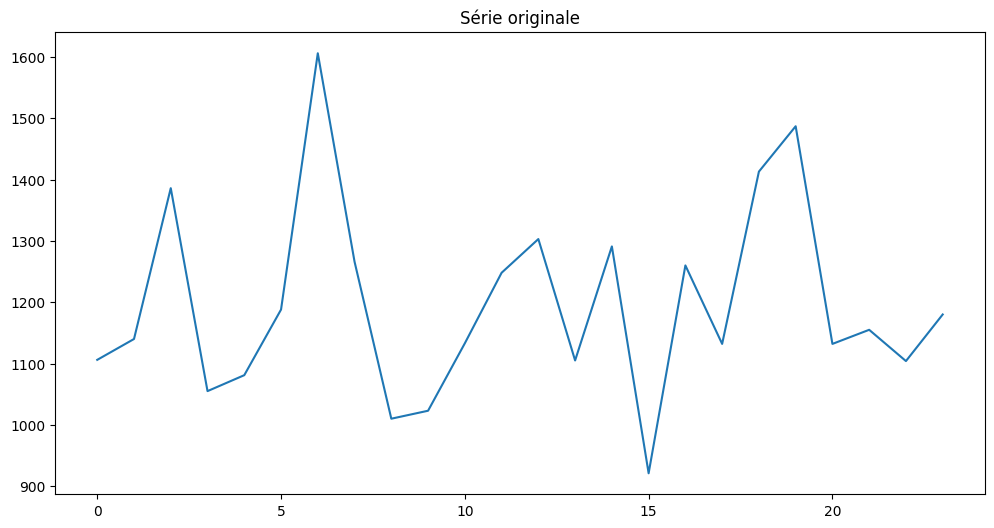

In [ ]:
ventes_mensuelles['Quantité'].plot(figsize=(12,6), title='Série originale')


**Tester la différenciation saisonnière**

une simple différenciation saisonnière suffit pour rendre la série stationnaire (et donc modélisable par ARIMA ou SARIMA).

In [ ]:
#la différence entre la quantité de chaque mois et celle du même mois l’année précédente
# Différence saisonnière (12 mois)
ventes_mensuelles['saison_diff'] = ventes_mensuelles['Quantité'].diff(12)

# Test ADF
result = adfuller(ventes_mensuelles['saison_diff'].dropna())
print(f"ADF saisonnière : {result[0]}")
print(f"p-value : {result[1]}")


ADF saisonnière : -3.4629548481885366
p-value : 0.008991049436249938


**Tracer les graphiques ACF et PACF pour déterminer les bons paramètres du modèle SARIMA.**

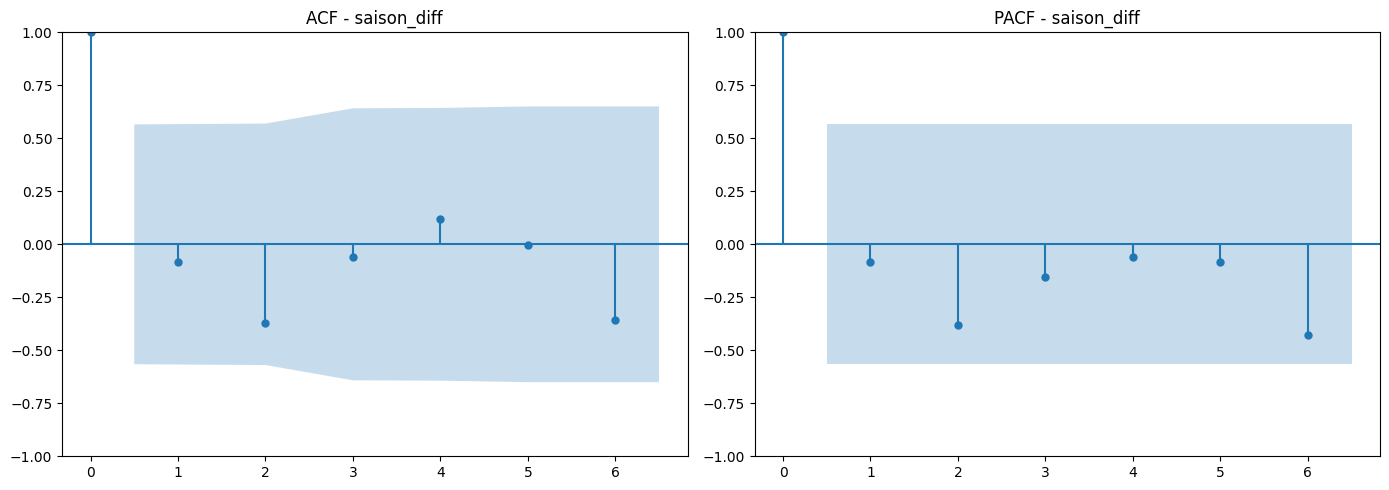

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#Création des graphiques ACF et PACF
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
#Calcul et tracé de la fonction  d'autocorrélation (ACF) pour déterminer q
plot_acf(ventes_mensuelles['saison_diff'].dropna(), ax=axes[0])
axes[0].set_title('ACF - saison_diff')
#Calcul et tracé de la fonction  d'autocorrélation (PACF) pour déterminer p
plot_pacf(ventes_mensuelles['saison_diff'].dropna(), ax=axes[1])
axes[1].set_title('PACF - saison_diff')
#Amélioration de la mise en page et affichage des graphiques
plt.tight_layout()
plt.show()


ACF:
Gros pic à lag 1, ensuite plus rien de significatif. → MA(1) semble suffisant → q = 1
PACF:
Gros pic aussi à lag 1, les autres sont faibles ou dans les bandes. → AR(1) semble suffisant → p = 1

# Paramétrage des hyperparamètres avec Grid Search pour SARIMA

est une méthode de recherche exhaustive sur un ensemble de paramètres prédéfinis (la "grille") pour trouver la meilleure combinaison selon un critère (ex: précision, AIC, etc.).

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import ParameterGrid
from tqdm import tqdm  # For progress bar
import warnings
warnings.filterwarnings('ignore') #Supprime les messages d’avertissement (pour garder l’affichage propre).

# Définition de la grille de paramètres
param_grid = {
    #paramètres non saisonniers
    'order': [
        (1,0,1), (1,1,1), (2,0,2),  # Basic combinations
        (0,1,1), (1,1,0), (2,1,2),   # Additional common patterns
        (1,0,0), (0,0,1)             # Simple AR or MA models
    ],
    #paramètres saisonniers
    'seasonal_order': [
        (0,1,0,12), (1,1,0,12),      # Seasonal AR
        (0,1,1,12), (0,2,1,12),      # Seasonal MA
        (1,1,1,12)                    # Full seasonal
    ]
}

print("\nStarting SARIMA parameter tuning...")
best_score = float('inf') # Score minimum initial
best_params = {}   # Dictionnaire des meilleurs paramètres
results_list = []  # Liste pour stocker tous les résultats

# Boucle de test sur toutes les combinaisons
for params in tqdm(ParameterGrid(param_grid), desc="Testing combinations"):
    try:
      #Crée un modèle SARIMAX avec les paramètres actuels
        model = SARIMAX(ventes_mensuelles['Quantité'],
                       order=params['order'],
                       seasonal_order=params['seasonal_order'])
        results = model.fit(disp=False)
      #Calcule le score AIC (Akaike Information Criterion), utilisé pour évaluer la qualité du modèle (plus petit = meilleur).
        current_aic = results.aic
        #Ajoute les résultats dans la liste de tous les tests.
        results_list.append({
            'params': params,
            'aic': current_aic
        })
    #Si l’AIC actuel est le meilleur, on l’enregistre et on affiche les nouveaux meilleurs paramètres.
        if current_aic < best_score:
            best_score = current_aic
            best_params = params
            print(f"New best: {params} (AIC: {best_score:.2f})")
    #Ignore les erreurs
    except Exception as e:
        continue

# Affichage des 5 meilleurs modèles
print("\nTop 5 parameter combinations:")
sorted_results = sorted(results_list, key=lambda x: x['aic'])
for i, res in enumerate(sorted_results[:5]):
    print(f"{i+1}. {res['params']} - AIC: {res['aic']:.2f}")




Starting SARIMA parameter tuning...


Testing combinations:   2%|▎         | 1/40 [00:00<00:06,  6.46it/s]

New best: {'order': (1, 0, 1), 'seasonal_order': (0, 1, 0, 12)} (AIC: 157.09)


Testing combinations:  10%|█         | 4/40 [00:02<00:17,  2.04it/s]

New best: {'order': (1, 0, 1), 'seasonal_order': (0, 2, 1, 12)} (AIC: 8.00)


Testing combinations:  45%|████▌     | 18/40 [00:11<00:08,  2.46it/s]

New best: {'order': (0, 1, 1), 'seasonal_order': (0, 2, 1, 12)} (AIC: 6.00)


Testing combinations: 100%|██████████| 40/40 [00:19<00:00,  2.06it/s]


Top 5 parameter combinations:
1. {'order': (0, 1, 1), 'seasonal_order': (0, 2, 1, 12)} - AIC: 6.00
2. {'order': (0, 0, 1), 'seasonal_order': (0, 2, 1, 12)} - AIC: 6.00
3. {'order': (1, 0, 1), 'seasonal_order': (0, 2, 1, 12)} - AIC: 8.00
4. {'order': (1, 1, 1), 'seasonal_order': (0, 2, 1, 12)} - AIC: 8.00
5. {'order': (2, 0, 2), 'seasonal_order': (0, 2, 1, 12)} - AIC: 12.00


 le modèle avec les paramètres (0, 1, 1) et (0, 2, 1, 12) est celui qui a obtenu les meilleures performances selon l'AIC,car son AIC est plus petit (6.00) par rapport aux autres combinaisons testées.

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
#Création du modèle SARIMAX
model = SARIMAX(ventes_mensuelles['Quantité'],
                order=(1,0,1),                # p,d,q à adapter selon ACF/PACF
                seasonal_order=(0,1,0,12))    # P,D,Q,s (s = 12 pour mois)
#D : Le degré de différenciation saisonnière. Ici, D=1, ce qui signifie que la série est différenciée une fois pour éliminer la saisonnalité.
# Create model with BEST parameters found
#model = SARIMAX(ventes_mensuelles['Quantité'],
                #order=best_params['order'],                # Using tuned p,d,q
                #seasonal_order=best_params['seasonal_order'])  # Using tuned P,D,Q,s

#Ajustement du modèle aux données
model_fit = model.fit()
#Résumé du modèle
print(model_fit.summary())


                                      SARIMAX Results                                      
Dep. Variable:                            Quantité   No. Observations:                   24
Model:             SARIMAX(1, 0, 1)x(0, 1, [], 12)   Log Likelihood                 -75.543
Date:                             Wed, 23 Apr 2025   AIC                            157.085
Time:                                     15:42:31   BIC                            158.540
Sample:                                          0   HQIC                           156.547
                                              - 24                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5458      1.032      0.529      0.597      -1.478       2.569
ma.L1         -0.8505      

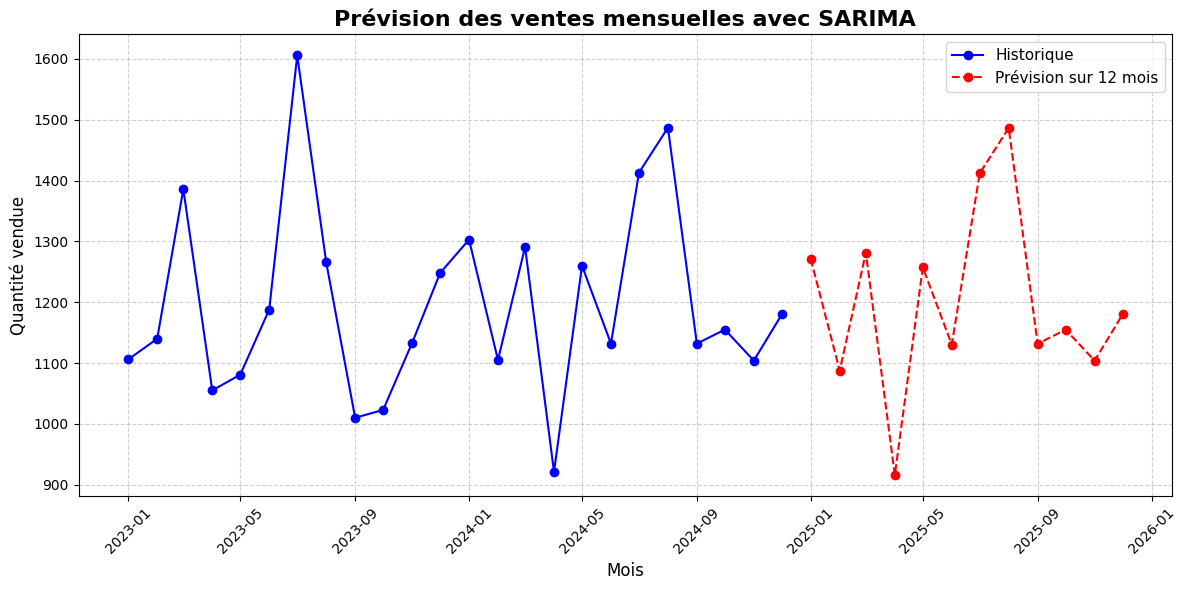

In [ ]:
# 1. Prévision sur 12 mois
forecast = model_fit.forecast(steps=12)

# 2. Créer les dates futures (1ère du mois) à partir du dernier mois existant
last_month = ventes_mensuelles['mois'].max()
future_dates = pd.date_range(start=last_month + pd.DateOffset(months=1), periods=12, freq='MS')

# 3. Tracer l’historique + prévision
plt.figure(figsize=(12,6))

# Données historiques
plt.plot(ventes_mensuelles['mois'], ventes_mensuelles['Quantité'], label='Historique', color='blue', marker='o')

# Données prévisionnelles
plt.plot(future_dates, forecast, label='Prévision sur 12 mois', color='red', linestyle='--', marker='o')

# Titres et axes
plt.title("Prévision des ventes mensuelles avec SARIMA", fontsize=16, fontweight='bold')
plt.xlabel("Mois", fontsize=12)
plt.ylabel("Quantité vendue", fontsize=12)

# Grille et légende
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=11)

# Améliorer affichage
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Conclusion:cette analyse était de prédire les ventes mensuelles futures en utilisant le modèle SARIMAX, afin de mieux comprendre les tendances saisonnières et d'anticiper les besoins futurs.**

# Deep learning using Deep Neural Network  (réseau de neurones)

**Objective :Classer les prix comme compétitifs / trop élevés / trop bas (0, 1 ou 2)**

**Apprentissage supervisé**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Renommer les colonnes pour plus de clarté
df_final.rename(columns={
    'Prix_Unitaire_x': 'Prix_Unitaire',
    'Prix_Total_x': 'Prix_Total'
}, inplace=True)

# Supprimer les lignes avec des valeurs manquantes sur les colonnes clés
df_final.dropna(subset=['Prix_Unitaire', 'Prix_Total'], inplace=True)

# Calcul du prix moyen par produit
prix_moyen = df_final.groupby('Id_Produit')['Prix_Unitaire'].mean().reset_index()
prix_moyen.columns = ['Id_Produit', 'Prix_Moyen']

# Fusion avec le dataframe principal
df_final = pd.merge(df_final, prix_moyen, on='Id_Produit')

# Fonction de classification des prix
def classifier(row):
    if row['Prix_Unitaire'] < row['Prix_Moyen'] * 0.99:
        return 0  # Trop Bas
    elif row['Prix_Unitaire'] > row['Prix_Moyen'] * 1.01:
        return 2  # Trop Élevé
    else:
        return 1  # Compétitif
        #Si le prix est entre -1% et +1% de la moyenne → Compétitif (1)

# Application de la fonction
df_final['Classe_Prix'] = df_final.apply(classifier, axis=1)

# Aperçu du résultat
print(df_final[['Id_Produit', 'Prix_Unitaire', 'Prix_Moyen', 'Classe_Prix']].head())


   Id_Produit  Prix_Unitaire  Prix_Moyen  Classe_Prix
0      160826         71.224      71.224            1
1      164975         62.784      62.784            1
2      166100         66.440      66.440            1
3      162363         39.160      39.160            1
4      166154         71.656      71.656            1


Encode & Normalize

In [ ]:
# Encodage LabelEncoder pour les colonnes catégorielles
categorical_cols = ['Nom_Produit', 'Catégorie_Produit']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_final[col] = le.fit_transform(df_final[col].astype(str))
    label_encoders[col] = le
#On choisit les colonnes utiles comme features (X) et la cible (y) qui est ici Classe_Prix.
# Définir X (features) et y (target)
features = ['Prix_Unitaire', 'Prix_Total', 'Nom_Produit', 'Catégorie_Produit']
X = df_final[features]
y = df_final['Classe_Prix']
#Mettre toutes les features numériques sur la même échelle
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#Séparation en train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


**construire les modèles d'apprentissage profond (Deep Learning)**

Définir le modèle

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
#Construction du modèle
model = Sequential() # modèle empilé couche par couche.
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1])) #couche entièrement connectée.
model.add(Dropout(0.3))  #pour éviter le sur-apprentissage (30% des neurones désactivés à chaque epoch)
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))  # dernière couche pour 3 classes (prédire une classe parmi 3)

#Compiler le modèle
model.compile(
    optimizer='adam',  #adam optimiseur très performant, souvent utilisé par défaut.
    loss='sparse_categorical_crossentropy', #à utiliser si tes y_train et y_test sont des entiers (0, 1, 2) plutôt que des vecteurs one-hot.
    metrics=['accuracy']  #pour suivre la précision pendant l’entraînement.
)

#Entraîner le modèle
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))




Epoch 1/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9634 - loss: 0.1832 - val_accuracy: 1.0000 - val_loss: 2.7248e-04
Epoch 2/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 3.7877e-04 - val_accuracy: 1.0000 - val_loss: 5.3085e-05
Epoch 3/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 1.2312e-04 - val_accuracy: 1.0000 - val_loss: 1.8649e-05
Epoch 4/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 5.6388e-05 - val_accuracy: 1.0000 - val_loss: 8.6507e-06
Epoch 5/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 3.7180e-05 - val_accuracy: 1.0000 - val_loss: 4.5094e-06
Epoch 6/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 2.0291e-05 - val_accuracy: 1.0000 - val_loss: 2.5488e-06
Epoch 7/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.5261e-05 - val_accuracy: 1.0000 - val_loss: 1.5730e-06
Epoch 8/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step 

In [ ]:
# Évaluation sur le jeu de test
#Cela teste le modèle sur le jeu jamais vu (X_test) pour vérifier ses performances.
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")
print(f"Test Loss: {loss:.2f}")


90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Test Accuracy: 1.00
Test Loss: 0.00


une précision de 100% sur les données de test, avec une perte de 0.00

In [ ]:
# Prédictions
y_pred_proba = model.predict(X_test) #donne les probabilités de chaque classe
y_pred = np.argmax(y_pred_proba, axis=1) #transforme ces probabilités en classe prédite


90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Évaluation des Performances du Modèle de Classification

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2872

    accuracy                           1.00      2872
   macro avg       1.00      1.00      1.00      2872
weighted avg       1.00      1.00      1.00      2872



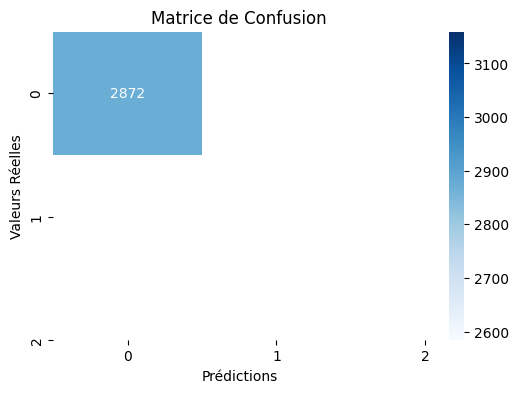

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# rapport de classification
print(classification_report(y_test, y_pred))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel('Prédictions')
plt.ylabel('Valeurs Réelles')
plt.title('Matrice de Confusion')
plt.show()


**Le rapport de classification** donne une vue d'ensemble de la performance du modèle par classe, incluant précision, rappel et F1-score.

**La matrice de confusion** permet de visualiser comment le modèle fait ses prédictions, en mettant en évidence les erreurs de classification.

évaluer le comportement de ton modèle pendant l'entraînement.

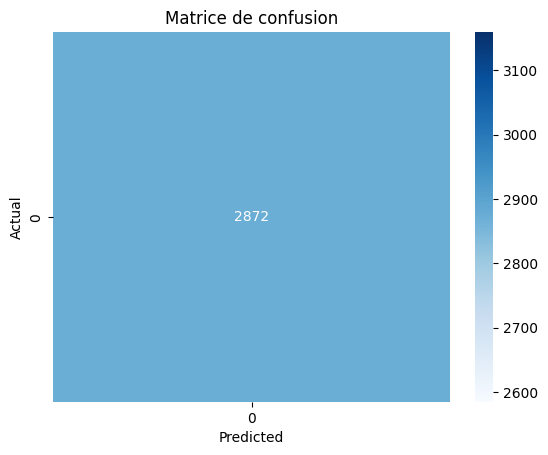

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matrice de confusion')
plt.show()


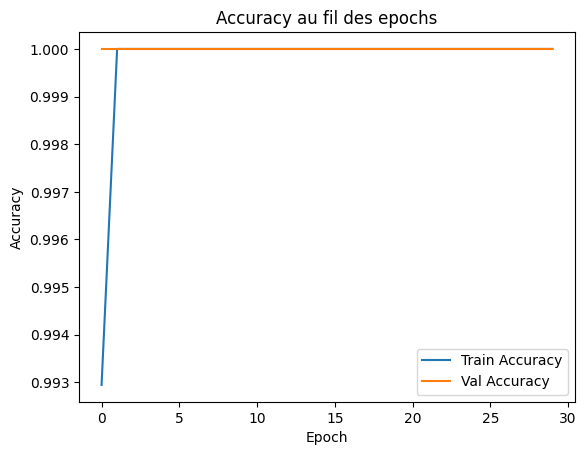

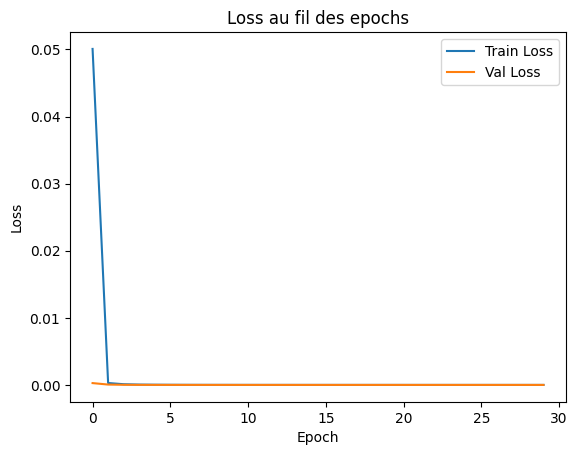

In [ ]:
# Courbe de précision (à quel point ton modèle apprend à faire de bonnes prédictions)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy au fil des epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Courbe de perte (Pour voir comment l'erreur de ton modèle évolue à chaque époque)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss au fil des epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Compter le nombre de lignes par classe

In [ ]:
print(df_final['Classe_Prix'].value_counts())


Classe_Prix
1    14356
Name: count, dtype: int64


Regarde quelques lignes au hasard pour vérifier si le calcul du Classe_Prix est correct.

In [ ]:
df_final[['Prix_Unitaire', 'Prix_Moyen', 'ratio', 'Classe_Prix']].sample(10)


,Prix_Unitaire,Prix_Moyen,ratio,Classe_Prix
8220,14.400,14.400,1.0,1
8482,72.096,72.096,1.0,1
13169,28.420,28.420,1.0,1
505,27.660,27.660,1.0,1
5228,71.976,71.976,1.0,1
1055,67.060,67.060,1.0,1
13623,63.840,63.840,1.0,1
6123,45.088,45.088,1.0,1
12014,36.080,36.080,1.0,1
7410,17.840,17.840,1.0,1


# Modèle RandomForest pour deep leaning

Random Forest - Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      2872

    accuracy                           1.00      2872
   macro avg       1.00      1.00      1.00      2872
weighted avg       1.00      1.00      1.00      2872

Random Forest - Accuracy:  1.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


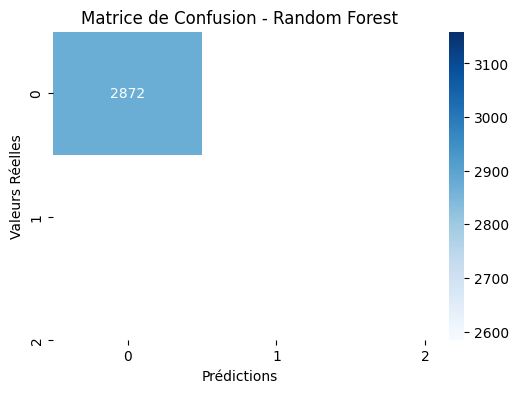

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Création du modèle RandomForest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement du modèle
rf_model.fit(X_train, y_train)

# Prédictions
y_pred_rf = rf_model.predict(X_test)

# Évaluation
print("Random Forest - Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest - Accuracy: ", accuracy_score(y_test, y_pred_rf))

# Matrice de confusion
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Prédictions')
plt.ylabel('Valeurs Réelles')
plt.title('Matrice de Confusion - Random Forest')
plt.show()
